<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/MS_spherical_collocation_shift_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp



N = 30

L0 = 2

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))     # collocation points

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                     



# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+1,N+1])
rSB = np.zeros([N+1,N+1])
Phi = np.zeros([N+1,N+1])
Pi = np.zeros([N+1,N+1])
Krr = np.zeros([N+1,N+1])
Chi = np.zeros([N+1,N+1])
#alpha = np.zeros([N,N])
#beta = np.zeros([N,N])

for i in range(N+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2))

# Derivada Matriz Base:

#colT[0,] = 0
#colT[1,] = 1

#xT[0,] = xcol*colT[0,]
#xT[1,] = xcol*colT[1,]

#for i in range(2, N+2):
 # colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]
  #xT[i,] = xcol*colT[i,]                                                    # colT[i,] = dT[i,]/dcol, xcol = dcol/dx

#psi = T[0:N,:]   
#xpsi = xT[0:N,:]


# Initial conditions                                         # PI initial

Phi_0 = 0.0001*r**2*np.exp(-(r-0.5)**2)            # Phi initial

inv_SB = np.linalg.inv(SB)
  
a0 = np.dot(Phi_0, inv_SB)  # coeficients a(0)



phi = np.dot(a0, SB)      # approximative solution in t=0





In [43]:
rSB

array([[-1.24076187e-03, -4.93224620e-03, -1.09827448e-02,
        -1.92417142e-02, -2.95031768e-02, -4.15103755e-02,
        -5.49615776e-02, -6.95168984e-02, -8.48059917e-02,
        -1.00436435e-01, -1.16002622e-01, -1.31094964e-01,
        -1.45309191e-01, -1.58255555e-01, -1.69567709e-01,
        -1.78911086e-01, -1.85990576e-01, -1.90557334e-01,
        -1.92414560e-01, -1.91422136e-01, -1.87500000e-01,
        -1.80630185e-01, -1.70857489e-01, -1.58288737e-01,
        -1.43090678e-01, -1.25486542e-01, -1.05751342e-01,
        -8.42060222e-02, -6.12105911e-02, -3.71563784e-02,
        -1.24575982e-02],
       [-3.68529188e-03, -1.42099736e-02, -3.00206392e-02,
        -4.86595488e-02, -6.69524277e-02, -8.12537641e-02,
        -8.77333338e-02, -8.26848525e-02, -6.28360507e-02,
        -2.56391704e-02,  3.04780714e-02,  1.05918681e-01,
         1.99793918e-01,  3.09881933e-01,  4.32672263e-01,
         5.63495522e-01,  6.96732273e-01,  8.26089976e-01,
         9.44932491e-01,  1.04

In [37]:
# Plot: Initial Conditions

M = 3000

rplot = np.linspace(0,30,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

Phi_plot0 = 0.0001*rplot**2*np.exp(-(rplot-0.5)**2)     

#dtf_plot0 = (2*(xplot))*np.exp(-(xplot)**2/u**2)/u**2 

phiplot = np.dot(a0, SBplot)

erro = abs(phiplot - Phi_plot0)

#dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


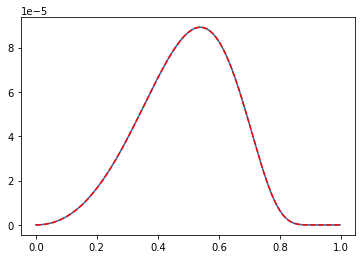

In [4]:
plt.plot(colplot, phiplot, colplot, Phi_plot0, "--r")

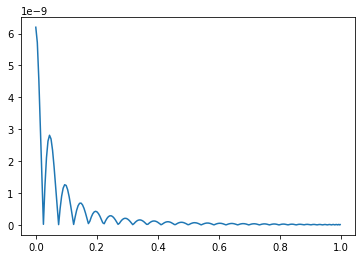

In [ ]:
plt.plot(colplot, erro)

In [5]:
# Initial values of PI:

Pi_0 = 0

b0 = np.dot(Pi_0, inv_SB)

Pi = np.dot(b0, SB) 

In [50]:
# Initial values of Krr:

Krr_0 = 0

#SB[0,] = 1
#SB[1,] = r

#for i in range(2,N+3):
 # SB[i-1,] = 1/2*(SB[2*i+2,] + SB[2*i,])

for i in range(2,N+2):
  SB1[i,] = 2*SB[2*i-1,] - SB[2*i-2,]

psi =  SB[0:N,:] 

inv_psi = np.linalg.inv(psi)

ck0 = np.dot(Krr_0, inv_psi)

Krr = np.dot(ck0, SB) 

IndexError: ignored

In [49]:
# Initial values of CHI:

Chi_0 = 0.001

c0 = np.dot(Chi_0, inv_SB)

Chi = np.dot(b0, SB) 


In [ ]:
# Initial values of alpha:

alpha_0 = 

al0 = np.dot(alpha_0, inv_SB)

alpha = 1 + np.dot(al0, SB)

In [ ]:
# Initial values of beta:

beta_0 = 

be0 = np.dot(beta_0, inv_SB)

beta = np.dot(be0, SB)